In [6]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("recrutement.db")

df = pd.read_sql_query("SELECT * FROM kpi_recrutement", conn)

print("Aperçu des données :")
display(df.head())

df_trim = df[df["mois"].str.lower().isin(["juillet", "août", "septembre"])]

kpi_interet = [
    "Nb de candidats contactés",
    "Nb d'entretiens candidats Salariés",
    "Nb d'entretiens candidats Sous-Traitants",
    "Nb de candidats recrutés Salariés",
    "Nb de candidats intégrés Sous Traitants"
]

df_kpi = df_trim[df_trim["kpi_nom"].isin(kpi_interet)]

# 6. Calcul des KPI totaux par type
kpi_totaux = df_kpi.groupby("kpi_nom")["valeur"].sum().reset_index()
print("\n=== KPI globaux (Équipe) ===")
display(kpi_totaux)

# 7. Trouver le recruteur qui a contacté le plus de candidats
contacts = df_kpi[df_kpi["kpi_nom"] == "Nb de candidats contactés"]
top_contact = contacts.groupby("rh_nom")["valeur"].sum().reset_index().sort_values(by="valeur", ascending=False)
print("\nRecruteur ayant contacté le plus de candidats :")
display(top_contact.head(1))

# 8. Trouver le recruteur avec le plus de recrutements (salariés + sous-traitants)
recrutements = df_kpi[df_kpi["kpi_nom"].isin([
    "Nb de candidats recrutés Salariés",
    "Nb de candidats intégrés Sous Traitants"
])]
top_recruteur = recrutements.groupby("rh_nom")["valeur"].sum().reset_index().sort_values(by="valeur", ascending=False)
print("\nRecruteur ayant réalisé le plus de recrutements :")
display(top_recruteur.head(1))



Aperçu des données :


,rh_nom,mois,kpi_nom,valeur,commentaire,periode_recrutement
0,Inès,Juillet,Nb de candidats contactés,92,,Q1/2023
1,Inès,Août,Nb de candidats contactés,78,,Q1/2023
2,Inès,Septembre,Nb de candidats contactés,66,,Q1/2023
3,Inès,Juillet,Nb d'entretiens candidats Salariés,4,,Q1/2023
4,Inès,Août,Nb d'entretiens candidats Salariés,1,,Q1/2023



=== KPI globaux (Équipe) ===


,kpi_nom,valeur
0,Nb d'entretiens candidats Salariés,27
1,Nb d'entretiens candidats Sous-Traitants,135
2,Nb de candidats contactés,809
3,Nb de candidats intégrés Sous Traitants,2
4,Nb de candidats recrutés Salariés,1



Recruteur ayant contacté le plus de candidats :


,rh_nom,valeur
0,Inès,236



Recruteur ayant réalisé le plus de recrutements :


,rh_nom,valeur
2,Pauline,2


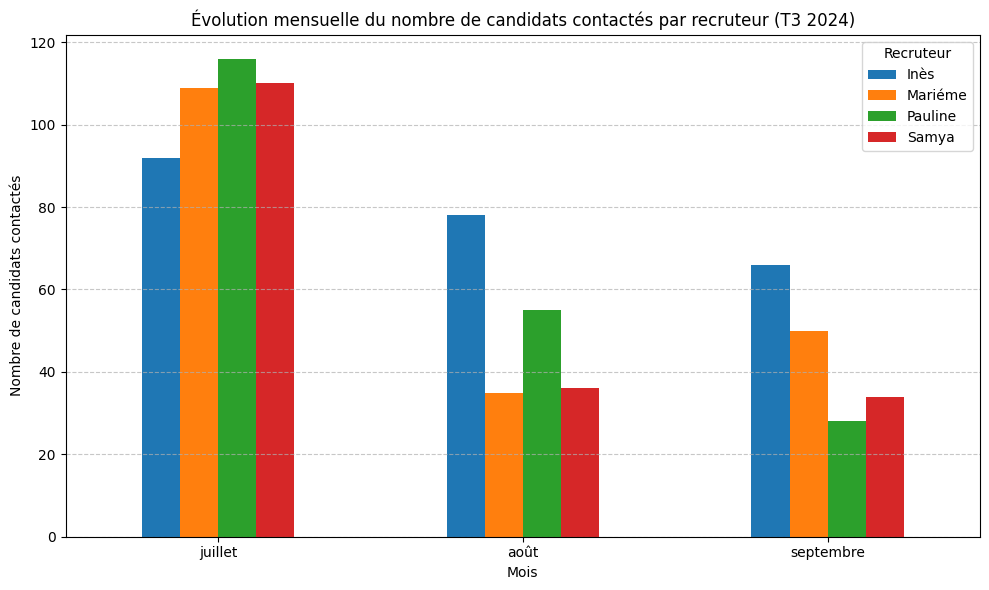

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("recrutement.db")

df = pd.read_sql_query("SELECT * FROM kpi_recrutement", conn)

conn.close()

df["mois"] = df["mois"].str.lower().str.strip()
df["kpi_nom"] = df["kpi_nom"].str.strip()
df["rh_nom"] = df["rh_nom"].str.strip()

contacts = df[df["kpi_nom"] == "Nb de candidats contactés"]

contacts_mensuels = contacts.groupby(["mois", "rh_nom"])["valeur"].sum().reset_index()

mois_ordre = ["juillet", "août", "septembre"]
pivot = contacts_mensuels.pivot(index="mois", columns="rh_nom", values="valeur").fillna(0)
pivot = pivot.reindex(mois_ordre)

ax = pivot.plot(kind="bar", figsize=(10, 6))
plt.title("Évolution mensuelle du nombre de candidats contactés par recruteur (T3 2024)")
plt.xlabel("Mois")
plt.ylabel("Nombre de candidats contactés")
plt.legend(title="Recruteur")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()


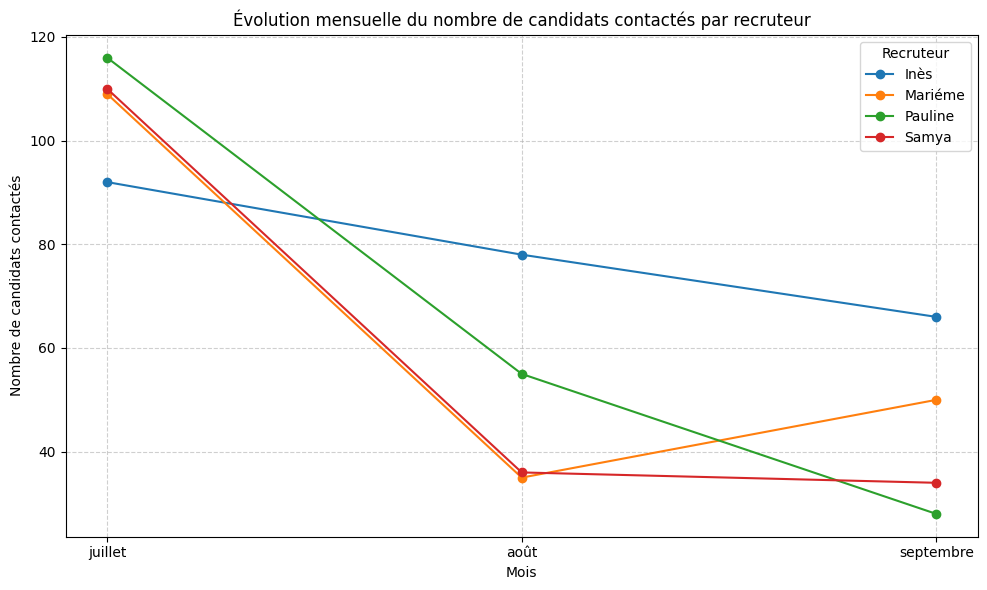

In [ ]:
plt.figure(figsize=(10, 6))
for rh in pivot.columns:
    plt.plot(pivot.index, pivot[rh], marker='o', label=rh)

plt.title("Évolution mensuelle du nombre de candidats contactés par recruteur")
plt.xlabel("Mois")
plt.ylabel("Nombre de candidats contactés")
plt.legend(title="Recruteur")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# Remarque 
Le mois le plus actif est Juillet ! 
Le mois le moin actif est Septembre !


# Conclusion 
Le mois de Juillet est le mois parfait pour recrute des nouveau talent 